In [1]:
#Importing libraries
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold,  train_test_split, learning_curve,GridSearchCV 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import time
from sklearn.svm import SVC
from scipy import stats
from scipy.stats import ttest_rel


In [2]:
#Reading the dataset
df = "/kaggle/input/adult-data/adult.data"
df1 = "/kaggle/input/test-data/adult.test"

Data1 = pd.read_csv(df)
Data2 = pd.read_csv(df1)

In [3]:
#Exploring the dataset by viewing the structure a of the dataset
Data1.head()


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [98]:
#Exploring the dataset by viewing the data types of the data
Data1.dtypes

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [3]:
#Structuring the data with column names
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                'hours-per-week', 'native-country', 'income']

train_data = pd.read_csv(df, names=column_names, sep=',\s', na_values=["?"], engine='python')
test_data = pd.read_csv(df1, names=column_names, sep=',\s', na_values=["?"], engine='python')

In [4]:
#Viewing the categorized new train dataset
train_data.head(200)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23,Private,197387,5th-6th,3,Married-civ-spouse,Transport-moving,Other-relative,White,Male,0,0,40,Mexico,<=50K
196,36,Private,99374,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
197,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,14084,0,55,United-States,>50K
198,35,Private,138992,Masters,14,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,7298,0,40,United-States,>50K


In [9]:
#Viewing the categorized new test dataset
test_data.head(200)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,26,Private,209440.0,HS-grad,9.0,Never-married,Prof-specialty,Unmarried,Black,Female,0.0,0.0,55.0,United-States,<=50K.
196,31,Private,56964.0,Some-college,10.0,Divorced,Exec-managerial,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K.
197,44,Private,299197.0,Some-college,10.0,Never-married,Transport-moving,Not-in-family,White,Male,0.0,0.0,45.0,United-States,<=50K.
198,42,Self-emp-inc,240628.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.0,0.0,50.0,United-States,>50K.


In [5]:
#Removing the first row of the test data
test_data = test_data.iloc[1:]

In [52]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [53]:
#Finding missing values for training data
print(train_data.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [10]:
#Finding missing values for test data
print(test_data.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [6]:
#Removing null values from both train and test data
data = train_data.dropna()
data2 = test_data.dropna()


In [7]:
#Label encoding the training data
converter = LabelEncoder() 
for column in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']: 
    data.loc[:, column] = converter.fit_transform(data[column])


In [26]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [8]:
#label encoding the test data
converter = LabelEncoder() 
for column in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']: 
    data2.loc[:, column] = converter.fit_transform(data2[column])

In [28]:
data2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,2,226802.0,1,7.0,4,6,3,2,1,0.0,0.0,40.0,37,0
2,38,2,89814.0,11,9.0,2,4,0,4,1,0.0,0.0,50.0,37,0
3,28,1,336951.0,7,12.0,2,10,0,4,1,0.0,0.0,40.0,37,1
4,44,2,160323.0,15,10.0,2,6,0,2,1,7688.0,0.0,40.0,37,1
6,34,2,198693.0,0,6.0,4,7,1,4,1,0.0,0.0,30.0,37,0


In [9]:
#Forming the training and testing datasets
y_train = data['income']
y_test = data2['income']
x_train = data.drop('income', axis=1)
x_test = data2.drop('income', axis=1)

In [10]:
#Changing the data type of the target variable for train set
y_train = y_train.astype('int64')
y_train

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 30162, dtype: int64

In [11]:
#Changing the data type of the target variable for test set
y_test = y_test.astype('int64')
y_test

1        0
2        0
3        1
4        1
6        0
        ..
16276    0
16277    0
16279    0
16280    0
16281    1
Name: income, Length: 15060, dtype: int64

In [41]:
#Checking class imbalance
value_to_count_1 = 1
value_to_count_0 = 0


count_1 = (y_train == value_to_count_1).sum()
count_0 = (y_train == value_to_count_0).sum()


print(f"Count of 1s in column 'binary_column': {count_1}")
print(f"Count of 0s in column 'binary_column': {count_0}")

Count of 1s in column 'binary_column': 7508
Count of 0s in column 'binary_column': 22654


In [32]:
#Implementing Stratified k-fold cross validation for KNN

cv=5
knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=cv)
scores = cross_val_score(knn, x_train, y_train, cv=skf) 
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.76761147 0.76893751 0.76873342 0.76392573 0.77072281]
Mean cross-validation score: 0.7679861886942769


In [33]:
#Implementing Stratified k-fold cross validation for SVM

svm = SVC()
skf = StratifiedKFold(n_splits=cv)
scores = cross_val_score(svm, x_train, y_train, cv=skf) 
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation scores: [0.78866236 0.78617603 0.78713528 0.78945623 0.78796419]
Mean cross-validation score: 0.787878818355807


In [14]:
#Implementing Grid Search algorithm for KNN
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Defining the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

#Defining hyperparameters for tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initializing GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)

#Fitting the model
grid_search_knn.fit(x_train, y_train)


best_knn = grid_search_knn.best_estimator_

# Evaluating on the test set and printing best parameters
y_pred_knn = best_knn.predict(x_test)
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Training set score: {:.3f}".format(best_knn.score(x_train, y_train)))
print("Test set score: {:.3f}".format(best_knn.score(x_test, y_test)))
print(classification_report(y_test, y_pred_knn))

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Training set score: 0.859
Test set score: 0.832
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11359
           1       0.68      0.58      0.63      3700

    accuracy                           0.83     15059
   macro avg       0.78      0.75      0.76     15059
weighted avg       0.82      0.83      0.83     15059



Training time for KNN: 0.062480926513671875 seconds
Prediction time for KNN: 12.594259262084961 seconds
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11360
           1       0.68      0.58      0.63      3700

    accuracy                           0.83     15060
   macro avg       0.78      0.75      0.76     15060
weighted avg       0.82      0.83      0.83     15060

[[10356  1004]
 [ 1541  2159]]
Training set score: 0.862
Test set score: 0.831


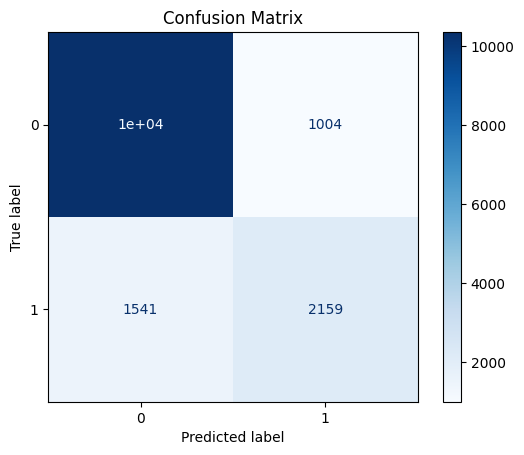

In [12]:
#Implementing KNN Algorithm
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create KNN model
start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=9, metric = 'manhattan',weights = 'uniform' )
knn_model.fit(x_train, y_train)
training_time = time.time() - start_time


# Making predictions
start_time = time.time()
y_pred = knn_model.predict(x_test)
prediction_time = time.time() - start_time

# Evaluating the model
print(f"Training time for KNN: {training_time} seconds")
print(f"Prediction time for KNN: {prediction_time} seconds")
print(classification_report(y_test, y_pred))
print("Training set score: {:.3f}".format(knn_model.score(x_train, y_train)))
print("Test set score: {:.3f}".format(knn_model.score(x_test, y_test)))

# Displaying the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

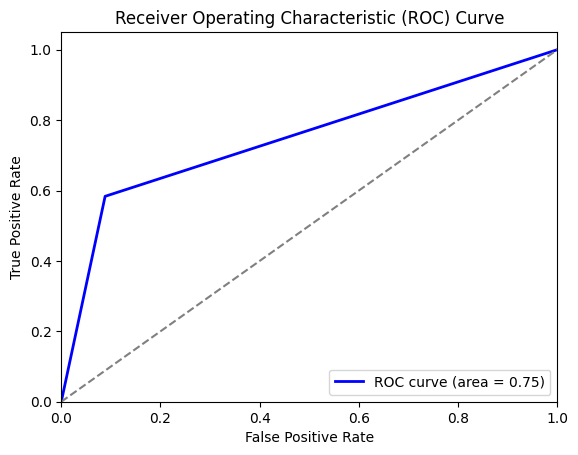

In [37]:
# Plot ROC-AUC curve for KNN
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

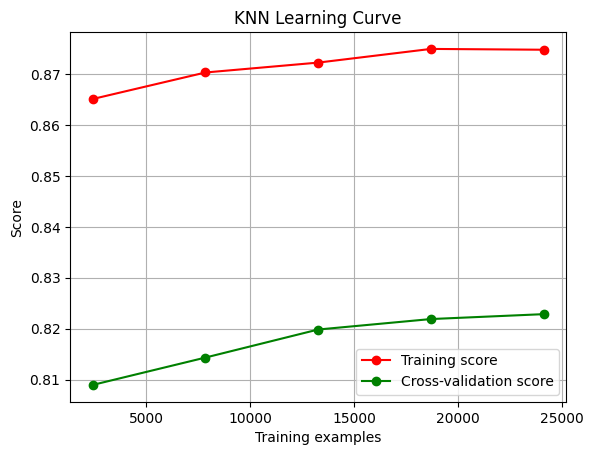

In [38]:
# Ploting Learning Curve for KNN

train_sizes, train_scores, test_scores = learning_curve(knn, x_train, y_train, cv=5, n_jobs=-1, 
                                                            train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("KNN Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


Accuracy: 0.831
95% Confidence Interval for accuracy: (0.825, 0.837)


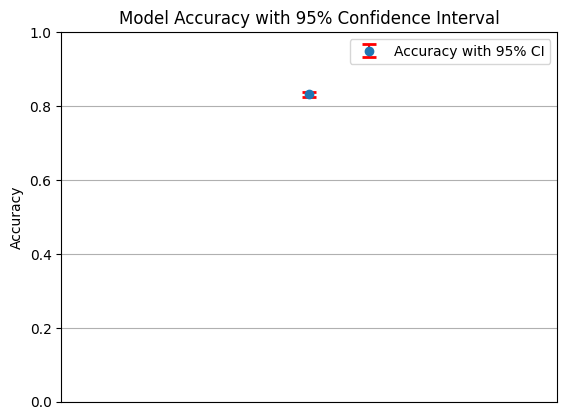

In [39]:
# Calculate the confidence interval for accuracy
accuracy = accuracy_score(y_test, y_pred)
confidence = 0.95
n = len(y_test)
stderr = np.sqrt((accuracy * (1 - accuracy)) / n)
z_score = stats.norm.ppf((1 + confidence) / 2)  # For 95% CI
margin_of_error = z_score * stderr

ci_lower = accuracy - margin_of_error
ci_upper = accuracy + margin_of_error

print(f"Accuracy: {accuracy:.3f}")
print(f"95% Confidence Interval for accuracy: ({ci_lower:.3f}, {ci_upper:.3f})")

#Graph plot
plt.errorbar(x=1, y=accuracy, yerr=margin_of_error, fmt='o', capsize=5, capthick=2, ecolor='red', label='Accuracy with 95% CI')
plt.xlim(0.5, 1.5)
plt.xticks([])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
#from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV
#from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split

##Implementing Grid Search Algorithm for SVM

# Defining the SVM model
svm = SVC()

# Defining hyperparameters for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Initializing GridSearchCV
grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=2, cv=5)

# Fitting the model
grid_search.fit(x_train, y_train)

# Printing the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluating on the test set
y_pred = grid_search.predict(x_test)
print("Test Accuracy:", grid_search.score(x_test, y_test))
print("Training set score: {:.3f}".format(grid_search.score(x_train, y_train)))
print("Test set score: {:.3f}".format(grid_search.score(x_test, y_test)))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  13.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  13.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  13.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  13.7s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  13.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.1min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  55.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  55.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  55.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  55.5s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  13.6s
[CV] END ....................C=0.1, gamma=0.1, 

Training time for SVM: 29.40596055984497 seconds
Prediction time for SVM: 7.960883855819702 seconds
[[10640   720]
 [ 1622  2078]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11360
           1       0.74      0.56      0.64      3700

    accuracy                           0.84     15060
   macro avg       0.81      0.75      0.77     15060
weighted avg       0.84      0.84      0.84     15060

Training set score: 0.851
Test set score: 0.844


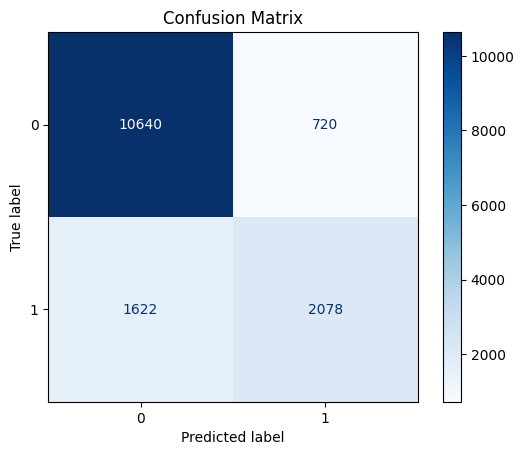

In [53]:
#Implementing SVM 

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Creating the SVM model
start_time = time.time()
svm = SVC(C= 100, gamma = 0.01, kernel = 'rbf')
svm.fit(x_train, y_train)
training_time = time.time() - start_time

# Making predictions
start_time = time.time()
y_pred = svm.predict(x_test)
prediction_time = time.time() - start_time

# Evaluating the model
print(f"Training time for SVM: {training_time} seconds")
print(f"Prediction time for SVM: {prediction_time} seconds")
print(confusion_matrix(y_test, y_pred))
print("Training set score: {:.3f}".format(svm.score(x_train, y_train)))
print("Test set score: {:.3f}".format(svm.score(x_test, y_test)))

# Displaying the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

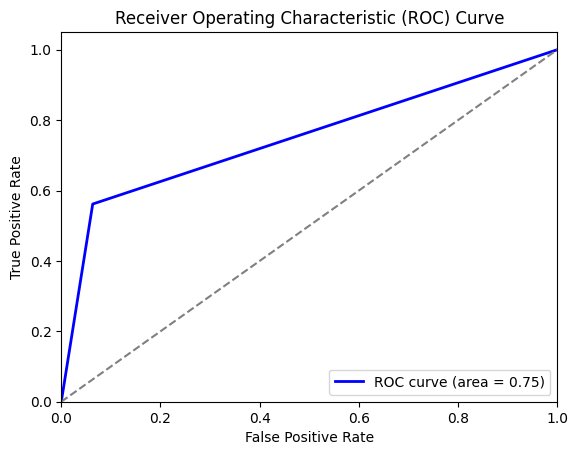

In [41]:
# Plotting ROC-AUC curve

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

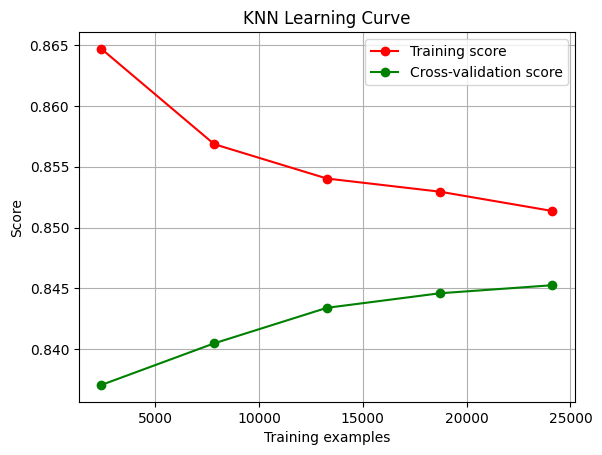

In [42]:
# Plotting Learning curve

train_sizes, train_scores, test_scores = learning_curve(svm, x_train, y_train, cv=5, n_jobs=-1, 
                                                            train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.title("KNN Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


Accuracy: 0.844
95% Confidence Interval for accuracy: (0.839, 0.850)


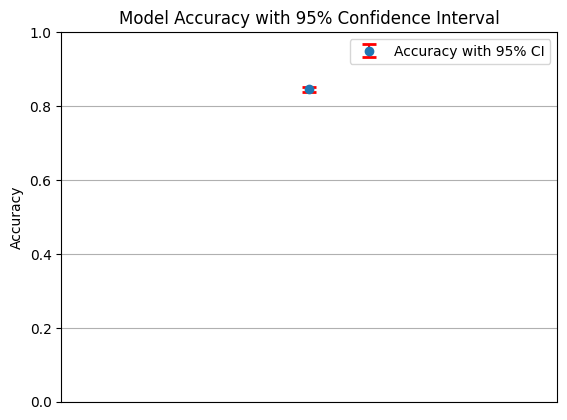

In [43]:
# Calculate the confidence interval for accuracy
accuracy = accuracy_score(y_test, y_pred)
confidence = 0.95
n = len(y_test)
stderr = np.sqrt((accuracy * (1 - accuracy)) / n)
z_score = stats.norm.ppf((1 + confidence) / 2)  # For 95% CI
margin_of_error = z_score * stderr

ci_lower = accuracy - margin_of_error
ci_upper = accuracy + margin_of_error

print(f"Accuracy: {accuracy:.3f}")
print(f"95% Confidence Interval for accuracy: ({ci_lower:.3f}, {ci_upper:.3f})")

#Graph plot
plt.errorbar(x=1, y=accuracy, yerr=margin_of_error, fmt='o', capsize=5, capthick=2, ecolor='red', label='Accuracy with 95% CI')
plt.xlim(0.5, 1.5)
plt.xticks([])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
#Implementing Stratified k-fold cross validation again to obtain accuracy values of improved model

#KNN
cv=5
knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=cv)
scores = cross_val_score(knn, x_train, y_train, cv=skf) 
print("Cross-validation scores for KNN:", scores)

#SVM
svm = SVC()
skf = StratifiedKFold(n_splits=cv)
scores = cross_val_score(svm, x_train, y_train, cv=skf) 
print("Cross-validation scores for SVM:", scores)



Cross-validation scores for KNN: [0.81518316 0.81932703 0.82543103 0.8313992  0.8229443 ]
Cross-validation scores for SVM: [0.83756009 0.84369302 0.84549072 0.8494695  0.84449602]


In [49]:
# Performing t-test
knn_scores = [0.81, 0.82, 0.82, 0.83, 0.82]
svm_scores = [0.84, 0.84, 0.84, 0.85, 0.84]

t_stat, p_value = ttest_rel(knn_scores, svm_scores)

print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.5f}")

t-statistic: -11.000, p-value: 0.00039
